In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import cufflinks as cf
from IPython.display import display,HTML
cf.set_config_file(sharing='public',theme='ggplot',offline=True) 

def show_ticker_symbols(tickers, period="1y"):
    for t in tickers:
        t_info = t.info
        t_name = f"{t_info['shortName']} ({t_info['symbol']})"
        t_df = t.history(period=period, rounding=True)
        t_df['Close'].iplot(kind='line',xTitle='Date', yTitle='Close', title=t_name)
    
    
def show_ticker_change(tickers):
    results = pd.DataFrame(columns=['7 Day', '30 Day'])
    for t in tickers:
        t_info = t.info
        t_name = f"{t_info['shortName']} ({t_info['symbol']})"
        df = t.history(period='7d', rounding=True)
        start_close = list(df['Close'])[0]
        stop_close = list(df['Close'])[-1]
        results.loc[t_name, '7 Day'] = f"{round(((stop_close - start_close) / start_close) * 100, 1)}%"
        df = t.history(period='30d', rounding=True)
        start_close = list(df['Close'])[0]
        stop_close = list(df['Close'])[-1]
        results.loc[t_name, '30 Day'] = f"{round(((stop_close - start_close) / start_close) * 100, 1)}%"
        df = t.history(period='6mo', rounding=True)
        start_close = list(df['Close'])[0]
        stop_close = list(df['Close'])[-1]
        results.loc[t_name, '6 Month'] = f"{round(((stop_close - start_close) / start_close) * 100, 1)}%"
        df = t.history(period='12mo', rounding=True)
        start_close = list(df['Close'])[0]
        stop_close = list(df['Close'])[-1]
        results.loc[t_name, '1 Year'] = f"{round(((stop_close - start_close) / start_close) * 100, 1)}%"
    return(results)

In [6]:
csco = yf.Ticker("CSCO")
soyb = yf.Ticker("SOYB")
corn = yf.Ticker("CORN")
gold = yf.Ticker("GLD")
oil = yf.Ticker("USO")

tickers = [csco, soyb, corn, gold, oil]

In [9]:
show_ticker_change(tickers)

,7 Day,30 Day,6 Month,1 Year
"Cisco Systems, Inc. (CSCO)",-0.4%,0.6%,9.3%,49.3%
Teucrium Soybean Fund ETV (SOYB),0.9%,-3.8%,8.5%,45.7%
Teucrium Corn Fund ETV (CORN),1.8%,-4.4%,20.6%,57.4%
SPDR Gold Trust (GLD),-0.0%,-2.1%,2.1%,-7.4%
United States Oil Fund (USO),4.9%,12.2%,25.9%,84.0%


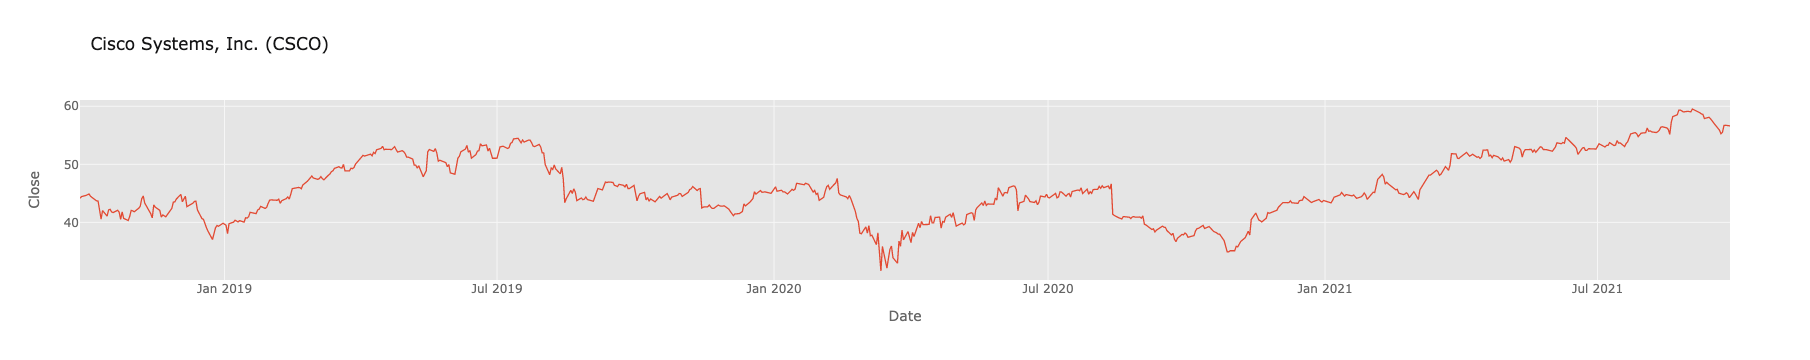

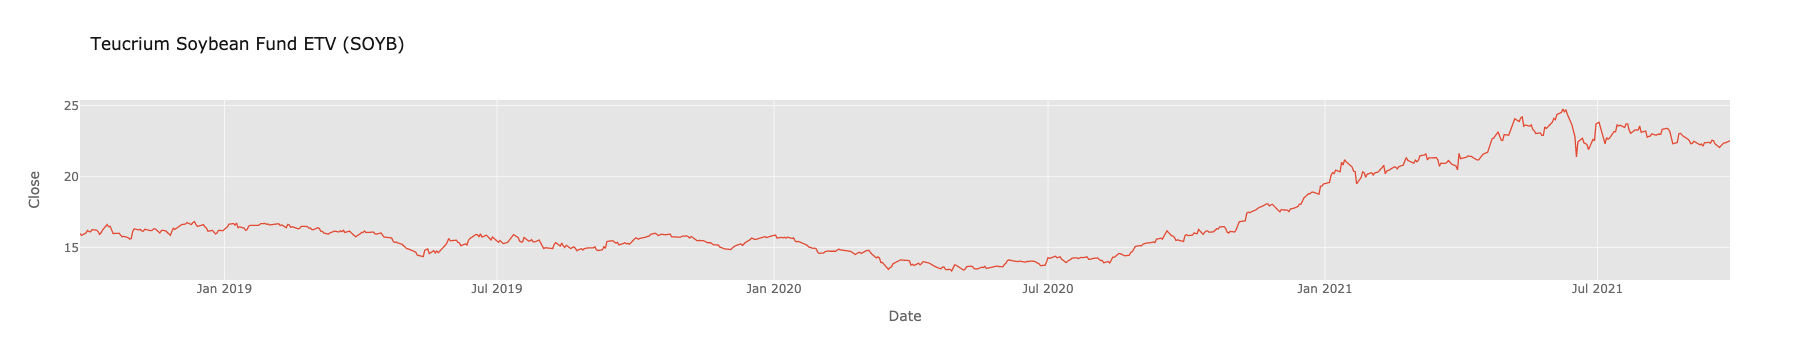

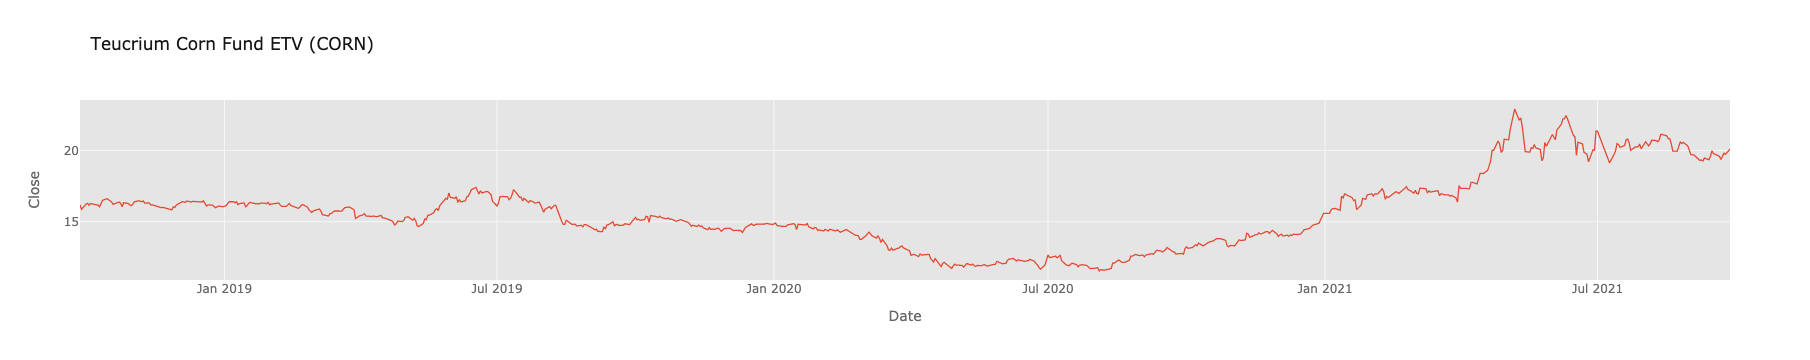

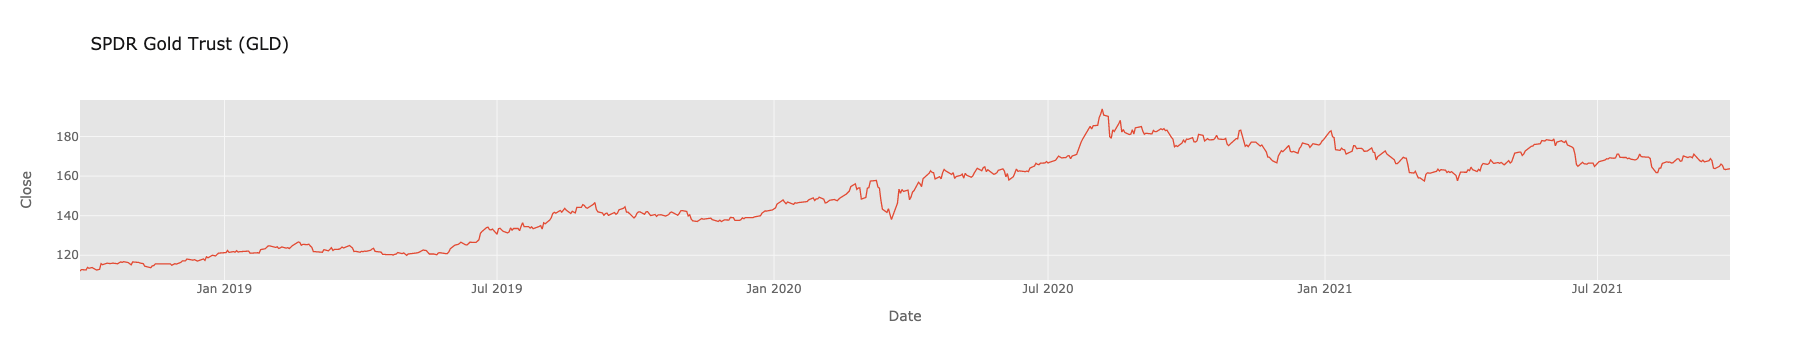

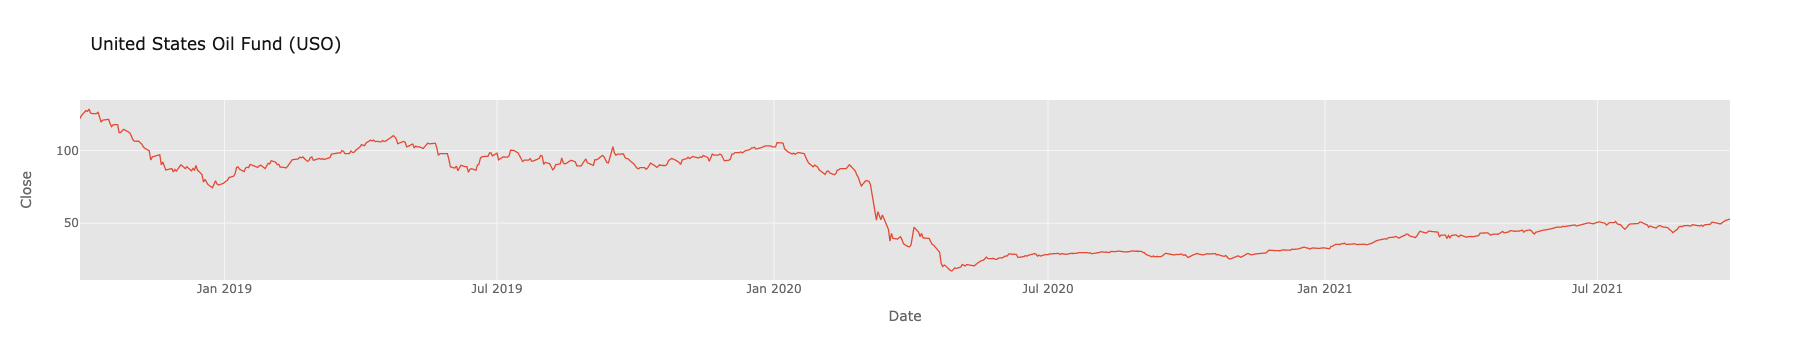

In [4]:
show_ticker_symbols(tickers, '3y')